x, y or z?: x
Rx Degrees?: 40


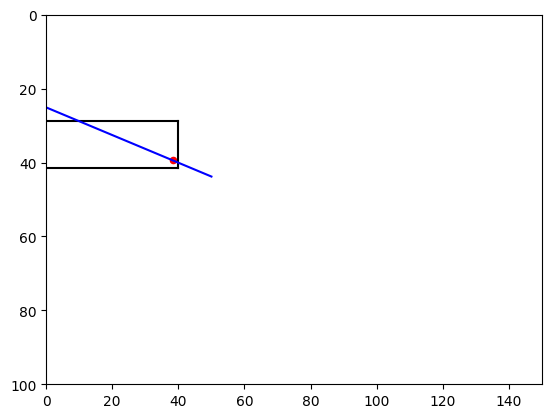

x, y or z?: 


In [2]:
"""
LRP
"""

import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, radians,sqrt

#——————————————fill lists with starting coordinates
xg=[ ]
yg=[ ]
zg=[ ]

xc=80 #————————center coordinates
yc=40
zc=40

x=[-40,-40,40,40,-40,50] #—system (plane and line geometry)
y=[0,0,0,0,-20,3]
z=[-10,10,10,-10,15,-10]

for i in range(len(x)):
  xg.append(x[i]+xc)
  yg.append(y[i]+yc)
  zg.append(z[i]+zc)

#——————————————————define  rotation  functions
def rotx(xc,yc,zc,xp,yp,zp,Rx):
  # Translasi titik ke pusat koordinat
  xp -= xc
  yp -= yc
  zp -= zc

  # Rotasi di sekitar sumbu x
  yp_rot = yp * cos(Rx) - zp * sin(Rx)
  zp_rot = yp * sin(Rx) + zp * cos(Rx)

  # Translasi kembali ke posisi asli
  xp_rot = xp + xc
  yp_rot += yc
  zp_rot += zc

  return xp_rot, yp_rot, zp_rot

def roty(xc,yc,zc,xp,yp,zp,Ry):
  # Translasi titik ke pusat koordinat
  xp -= xc
  yp -= yc
  zp -= zc

  # Rotasi di sekitar sumbu y
  xp_rot = xp * cos(Ry) + zp * sin(Ry)
  zp_rot = -xp * sin(Ry) + zp * cos(Ry)

  # Translasi kembali ke posisi asli
  xp_rot += xc
  yp_rot = yp + yc
  zp_rot += zc

  return xp_rot, yp_rot, zp_rot

def rotz(xc,yc,zc,xp,yp,zp,Rz):
  # Translasi titik ke pusat koordinat
  xp -= xc
  yp -= yc
  zp -= zc

  # Rotasi di sekitar sumbu z
  xp_rot = xp * cos(Rz) - yp * sin(Rz)
  yp_rot = xp * sin(Rz) + yp * cos(Rz)

  # Translasi kembali ke posisi asli
  xp_rot += xc
  yp_rot += yc
  zp_rot = zp + zc

  return xp_rot, yp_rot, zp_rot

#———————————————-plot  plane, line and hit point
def plotsystem(xg,yg,zg,xh,yh,xhg,yhg,hitcolor):
  plt.plot([xg[0],xg[1]],[yg[0],yg[1]],color='k')  #—————plot plane
  plt.plot([xg[1],xg[2]],[yg[1],yg[2]],color='k')
  plt.plot([xg[2],xg[3]],[yg[2],yg[3]],color='k')
  plt.plot([xg[3],xg[0]],[yg[3],yg[0]],color='k')
  plt.plot([xg[4],xg[5]],[yg[4],yg[5]],color='b') #———plot line

  if hitcolor=='g': #——————plot hit point at [5]
    plt.scatter(xg[5],yg[5],s=20,color=hitcolor)
  else: #——————plot hit point at h
    plt.scatter(xhg,yhg,s=20,color=hitcolor)

  plt.axis([0,150,100,0]) #———replot axes and grid
  plt.axis('on')
  plt.grid(False)
  plt.show() #———plot latest rotation

#—————————————find hit point coordinates and color
def hitpoint(x,y,z):
  a=x[5]-x[4]
  b=y[5]-y[4]
  c=z[5]-z[4]
  Q45=sqrt(a*a+b*b+c*c)  #———distance  point  4  to  5

  lx=a/Q45 #———unit vector components point 4 to 5
  ly=b/Q45
  lz=c/Q45

  a=x[3]-x[0]
  b=y[3]-y[0]
  c=z[3]-z[0]
  Q03=sqrt(a*a+b*b+c*c) #———distance 0 to 3

  ux=a/Q03 #———unit vector 0 to 3
  uy=b/Q03
  uz=c/Q03

  a=x[1]-x[0]
  b=y[1]-y[0]
  c=z[1]-z[0]
  Q01=sqrt(a*a+b*b+c*c) #———distance 0 to 1

  vx=a/Q01 #———unit vector 0 to 1
  vy=b/Q01
  vz=c/Q01

  nx=uy*vz-uz*vy #———normal unit vector
  ny=uz*vx-ux*vz
  nz=ux*vy-uy*vx

  vx1b=x[4]-x[0] #———vector components 0 to 4
  vy1b=y[4]-y[0]
  vz1b=z[4]-z[0]

  Qn=(vx1b*nx+vy1b*ny+vz1b*nz) #———perpendicular distance 4 to plane

  cosp=lx*nx+ly*ny+lz*nz #——cos of angle p
  Qh=abs(Qn/cosp) #———distance 4 to hit point

  xh=x[4]+Qh*lx  #———hit  point  coordinates
  yh=y[4]+Qh*ly
  zh=z[4]+Qh*lz

  xhg=xh+xc #———global hit point coordinates
  yhg=yh+yc
  zhg=zh+zc

  #————————————————————out of bounds check
  a=xh-x[0] #——components of vector V0h
  b=yh-y[0]
  c=zh-z[0]

  up=a*ux+b*uy+c*uz #———dot products
  vp=a*vx+b*vy+c*vz

  hitcolor='r' #———if inbounds plot red hit point
  if up<0: #———change color to blue if hit point out of bounds
    hitcolor='b'

  if up>Q03:
    hitcolor='b'

  if vp<0:
    hitcolor='b'

  if vp>Q01:
    hitcolor='b'

  a=x[5]-x[4]
  b=y[5]-y[4]
  c=z[5]-z[4]
  Q45=sqrt(a*a+b*b+c*c)

  if Q45 < Qh:
    hitcolor='g'

  return xh,yh,xhg,yhg,hitcolor

#————————————————transform  coordinates  and  plot
def  plotx(xc,yc,zc,Rx):   #———transform  &  plot  Rx  system
  for i in range(len(x)):
    [xg[i],yg[i],zg[i]]=rotx(xc,yc,zc,x[i],y[i],z[i],Rx)
    [x[i],y[i],z[i]]=[xg[i]-xc,yg[i]-yc,zg[i]-zc]

  xh,yh,xhg,yhg,hitcolor=hitpoint(x,y,z) #———returns xh,yh,xhg,yhg

  plotsystem(xg,yg,zg,xh,yh,xhg,yhg,hitcolor) #———plot

def ploty(xc,yc,zc,Ry):  #———transform & plot Ry system
  for i in range(len(x)):
    [xg[i],yg[i],zg[i]]=roty(xc,yc,zc,x[i],y[i],z[i],Ry)
    [x[i],y[i],z[i]]=[xg[i]-xc,yg[i]-yc,zg[i]-zc]

  xh,yh,xhg,yhg,hitcolor=hitpoint(x,y,z)

  plotsystem(xg,yg,zg,xh,yh,xhg,yhg,hitcolor)

def plotz(xc,yc,zc,Rz):   #———transform  &  plot  Rz  system
  for i in range(len(x)):
    [xg[i],yg[i],zg[i]]=rotz(xc,yc,zc,x[i],y[i],z[i],Rz)
    [x[i],y[i],z[i]]=[xg[i]-xc,yg[i]-yc,zg[i]-zc]

    xh,yh,xhg,yhg,hitcolor=hitpoint(x,y,z)

    plotsystem(xg,yg,zg,xh,yh,xhg,yhg,hitcolor)

#—————————————————-input data and plot system
while True:
  axis=input('x, y or z?: ') #———input axis of rotation (lower case)
  if axis == 'x': #—if x axis
    Rx=radians(float(input('Rx Degrees?: '))) #———input degrees
    plotx(xc,yc,zc,Rx) #–call function plotx

  if axis == 'y':
    Ry=radians(float(input('Ry Degrees?: '))) #———input degrees
    ploty(xc,yc,zc,Ry)

  if axis == 'z':
    Rz=radians(float(input('Rz Degrees?: '))) #———input degrees
    plotz(xc,yc,zc,Rz)

  if axis == '':
    break #—quit the program